In [3]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, Dataset
import timm
from torch.optim.lr_scheduler import StepLR
import pandas as pd
from PIL import Image


transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

data_dir = "/data/DATA/FINGERPRINT_DATA/DATA_VER5.0_JUNE2024/CSV_FILE/MIX_DATA_1.3/Clean_Sensor_Data(2850-147k)"

# Custom dataset class for loading data from CSV
class CustomImageDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data_frame.iloc[idx, 0])  # Assuming image path is in the first column
        image = Image.open(img_name).convert('RGB')
        label = self.data_frame.iloc[idx, 1]  # Assuming label is in the second column

        if self.transform:
            image = self.transform(image)

        return image, label

# Load data
batch_size=256
train_dataset = CustomImageDataset(csv_file=os.path.join(data_dir, 'TRAIN.csv'), root_dir=data_dir, transform=transform)
val_dataset = CustomImageDataset(csv_file=os.path.join(data_dir, 'VAL.csv'), root_dir=data_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9876702..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].
Clipping input data to 

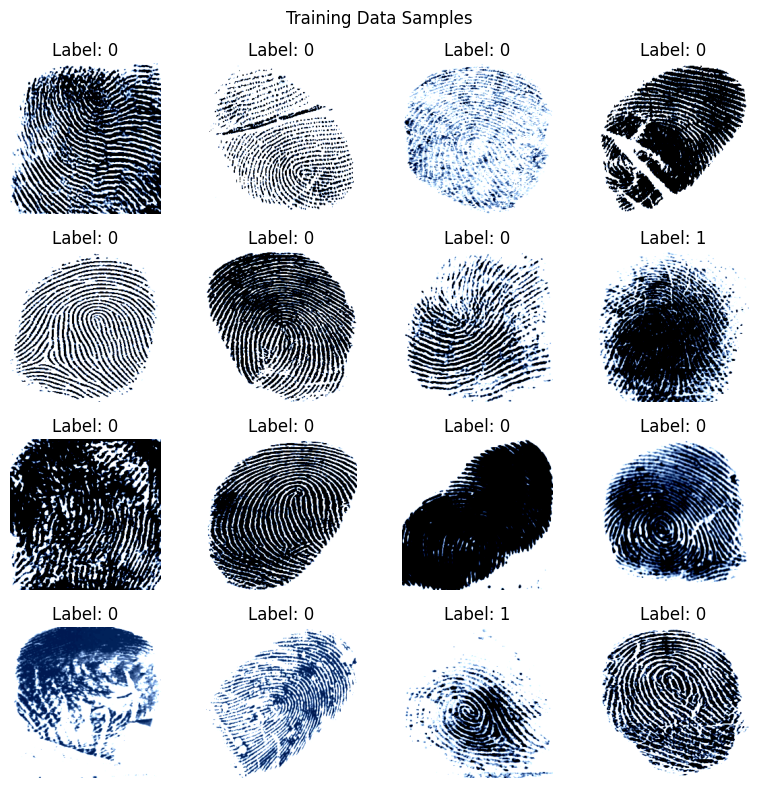

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9466565..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9980307..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06293353..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.02868402..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13143253..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06293353..2.5877128

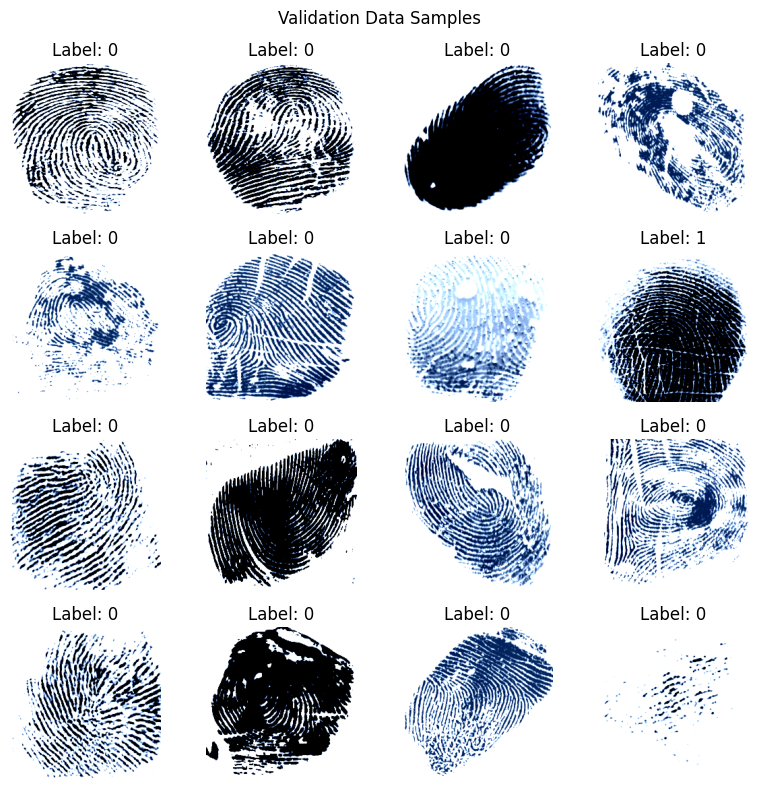

In [8]:
import matplotlib.pyplot as plt

def visualize_data(loader, title):
    images, labels = next(iter(loader))
    # Select a small set of images and labels
    images = images[:16]  # Visualize the first 16 images
    labels = labels[:16]

    # Create a grid of images
    grid_size = 4  # 4x4 grid
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(8, 8))
    axes = axes.flatten()
    
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img.permute(1, 2, 0).numpy())  # Convert from CHW to HWC
        ax.set_title(f'Label: {label.item()}')
        ax.axis('off')  # Hide axes

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Visualize training data
visualize_data(train_loader, "Training Data Samples")

# Visualize validation data
visualize_data(val_loader, "Validation Data Samples")


In [9]:
import pandas as pd
import os

# Load the CSV files into DataFrames
train_csv_path = os.path.join(data_dir, 'TRAIN.csv')
val_csv_path = os.path.join(data_dir, 'VAL.csv')

train_df = pd.read_csv(train_csv_path)
val_df = pd.read_csv(val_csv_path)

# Assuming the first column contains the image paths
train_base_names = train_df.iloc[:, 0].apply(lambda x: os.path.splitext(os.path.basename(x))[0])
val_base_names = val_df.iloc[:, 0].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

# Find common base names
common_base_names = set(train_base_names).intersection(set(val_base_names))

# Output the results
if common_base_names:
    print(f"Common image base names ({len(common_base_names)} found):")
    for name in common_base_names:
        print(name)
else:
    print("No common image base names found.")


Common image base names (415 found):
Noice_3_Fake_Tflite_21_02_2024_101407
Noice_2_Fake_Tflite_21_02_2024_113245
Noice_5_Fake_Tflite_21_02_2024_110823
Noice_5_Fake_Tflite_21_02_2024_113245
contrast_Fake_Tflite_21_02_2024_104755
Noice_7_Fake_Tflite_21_02_2024_114206
2022-11-23 16.06.39.604_4198501_1_Thumb_Normal_10_80_Live_Bright_0.99609375
Noice_6_Fake_Tflite_21_02_2024_114206
blur_Fake_Tflite_21_02_2024_115428
blur_Fake_Tflite_20_02_2024_180012
2022-11-23 16.07.28.368_4198501_1_Thumb_Normal_45_43_Live_Bright_0.87890625
13_Img_Blur_144.58714_Qty_0
Noice_4_Fake_Tflite_21_02_2024_101729
2022-11-23 15.45.56.171_3635273_1_Thumb_Normal_14_64_Live_Bright_0.87890625
Noice_4_Fake_Tflite_20_02_2024_174541
sharp_Fake_Tflite_21_02_2024_101729
Live_Tflite_20_02_2024_160844
Noice_5_Fake_Tflite_21_02_2024_104755
sharp_Live_Tflite_20_02_2024_154742
Noice_2_Fake_Tflite_21_02_2024_104755
sharp_Fake_Tflite_21_02_2024_113245
Noice_4_Fake_Tflite_21_02_2024_115349
2022-11-23 16.00.18.132_4198501_1_Thumb_No

In [10]:
import pandas as pd
import os

# Load the CSV files into DataFrames
train_csv_path = os.path.join(data_dir, 'TRAIN.csv')
val_csv_path = os.path.join(data_dir, 'VAL.csv')

train_df = pd.read_csv(train_csv_path)
val_df = pd.read_csv(val_csv_path)

# Assuming the first column contains the image paths
train_base_names = train_df.iloc[:, 0].apply(lambda x: os.path.splitext(os.path.basename(x))[0])
val_base_names = val_df.iloc[:, 0].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

# Find common base names
common_base_names = set(train_base_names).intersection(set(val_base_names))

# Output the results
if common_base_names:
    print(f"Common image base names ({len(common_base_names)} found):")
    for name in common_base_names:
        print(name)

    # Remove common base names from val_df
    val_df_filtered = val_df[~val_base_names.isin(common_base_names)]
    leng = len(val_df_filtered)
    # Save the filtered validation DataFrame to a new CSV (optional)
    val_filtered_csv_path = os.path.join(data_dir, f'VAL_{leng}.csv')
    val_df_filtered.to_csv(val_filtered_csv_path, index=False)
    print(f"Filtered validation DataFrame saved to {val_filtered_csv_path}.")
else:
    print("No common image base names found.")


Common image base names (415 found):
Noice_3_Fake_Tflite_21_02_2024_101407
Noice_2_Fake_Tflite_21_02_2024_113245
Noice_5_Fake_Tflite_21_02_2024_110823
Noice_5_Fake_Tflite_21_02_2024_113245
contrast_Fake_Tflite_21_02_2024_104755
Noice_7_Fake_Tflite_21_02_2024_114206
2022-11-23 16.06.39.604_4198501_1_Thumb_Normal_10_80_Live_Bright_0.99609375
Noice_6_Fake_Tflite_21_02_2024_114206
blur_Fake_Tflite_21_02_2024_115428
blur_Fake_Tflite_20_02_2024_180012
2022-11-23 16.07.28.368_4198501_1_Thumb_Normal_45_43_Live_Bright_0.87890625
13_Img_Blur_144.58714_Qty_0
Noice_4_Fake_Tflite_21_02_2024_101729
2022-11-23 15.45.56.171_3635273_1_Thumb_Normal_14_64_Live_Bright_0.87890625
Noice_4_Fake_Tflite_20_02_2024_174541
sharp_Fake_Tflite_21_02_2024_101729
Live_Tflite_20_02_2024_160844
Noice_5_Fake_Tflite_21_02_2024_104755
sharp_Live_Tflite_20_02_2024_154742
Noice_2_Fake_Tflite_21_02_2024_104755
sharp_Fake_Tflite_21_02_2024_113245
Noice_4_Fake_Tflite_21_02_2024_115349
2022-11-23 16.00.18.132_4198501_1_Thumb_No